<center>
    <img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

    Universidade de Fortaleza
    MBA em Ciência de Dados
    X731 - DASHBOARDS BIBLIOTECAS R/PYTHON
    Luiz Queiroz Barroso Junior - 2318643
</center>

------






# Exercício 1

Escolha um dataset de sua preferência com as seguintes características:

- Dado com um atributo rotulado (target)
- Pelo menos 4 variáveis númericas
- Pelo menos 1 variável categórica


1. Crie um pequeno texto de introdução ao seu dado. Explique a origem do dado e o tipo de problema que o entedimento deste pode proporcionar. No seu texto, tente responder as seguintes questões:

- Qual a origem do meu dado?
- Qual é o problema?
- Qual é a variável ALVO (target)?
- Porque eu me importo?
- Quais os ganhos possíveis no entendimento do meu dado?


2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots).

4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado.

5. Use o pandas profiling e gere um relatório automático.




# 1.Introdução

O dinheiro desempenha um papel crucial no desenvolvimento humano na sociedade. No entanto, vivemos em um momento em que a maior parte do poder econômico está concentrada em uma pequena fração da população. De acordo com o relatório mais recente da [Global Wealth Report 2023](https://www.ubs.com/microsites/latamaccess/pt/wealth-planning/articles/global-wealth-report-2023.html#wealth), no Brasil, 48,4% da riqueza nacional pertencem a apenas 1% da população.

Essa disparidade leva a uma realidade em que a população menos favorecida busca diversas alternativas para obter recursos financeiros. Uma prática comum é recorrer a empréstimos, nos quais um indivíduo recebe uma quantia de uma instituição financeira (bancos, corretoras, etc.) e se compromete a devolver o montante em parcelas ao longo do tempo, acrescidas de juros. No entanto, devido às inúmeras dificuldades socioeconômicas, muitas pessoas não conseguem cumprir com as condições estabelecidas, resultando em inadimplência.

O presente estudo tem como objetivo a análise de uma base de dados disponibilizada no [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) proveniente de uma instituição financeira que concede empréstimos. A exploração desses dados busca identificar um possível perfil de clientes inadimplentes, tendo como variável principal a informação sobre se o cliente efetuou ou não o pagamento do empréstimo.

A relevância dessa investigação reside na possibilidade de contribuir para a definição de futuras propostas de crédito pela instituição, baseadas no perfil dos clientes identificados durante a pesquisa.

## 1.1 Exploração inicial

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')

Dicionário:

Nome do recurso	| Descrição
:------ | :-------
person_age |	Idade
pesson_income |	Rendimento anual
person_home_ownership |	Propriedade de casa própria
person_emp_length |	Duração do emprego (em anos)
loan_intent  |	Intenção de empréstimo
loan_grade |	Grau do empréstimo
loan_amnt |	Montante do empréstimo
loan_int_rate |	Taxa de juro
loan_status |	Status do empréstimo (0 não é inadimplente, 1 é inadimplente)
loan_percent_income |	Renda percentual
cb_person_default_on_file |	Inadimplência histórica
cb_preson_cred_hist_length |	Comprimento do histórico de crédito

Fonte: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
#Verificação de espaços vázios
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Devido a ausencia de dados e a simplificação da exploração, serão utilizadas apenas as colunas a seguir:
* person_age
* person_income
* loan_amnt
* loan_status

In [ ]:
df1 = df[['person_age', 'person_income', 'loan_amnt', 'loan_status']]
df1.head()

,person_age,person_income,loan_amnt,loan_status
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1


In [ ]:
df1.loc[df1['loan_status'] == 1, 'loan_status'] = 'inadimplente'
df1.loc[df1['loan_status'] == 0, 'loan_status'] = 'adimplente'

In [ ]:
df1.describe()

,person_age,person_income,loan_amnt
count,32581.000000,3.258100e+04,32581.000000
mean,27.734600,6.607485e+04,9589.371106
std,6.348078,6.198312e+04,6322.086646
min,20.000000,4.000000e+03,500.000000
25%,23.000000,3.850000e+04,5000.000000
50%,26.000000,5.500000e+04,8000.000000
75%,30.000000,7.920000e+04,12200.000000
max,144.000000,6.000000e+06,35000.000000


# 2. Gráficos de dispersão das variáveis numéricas

In [ ]:
import matplotlib.pyplot as plt

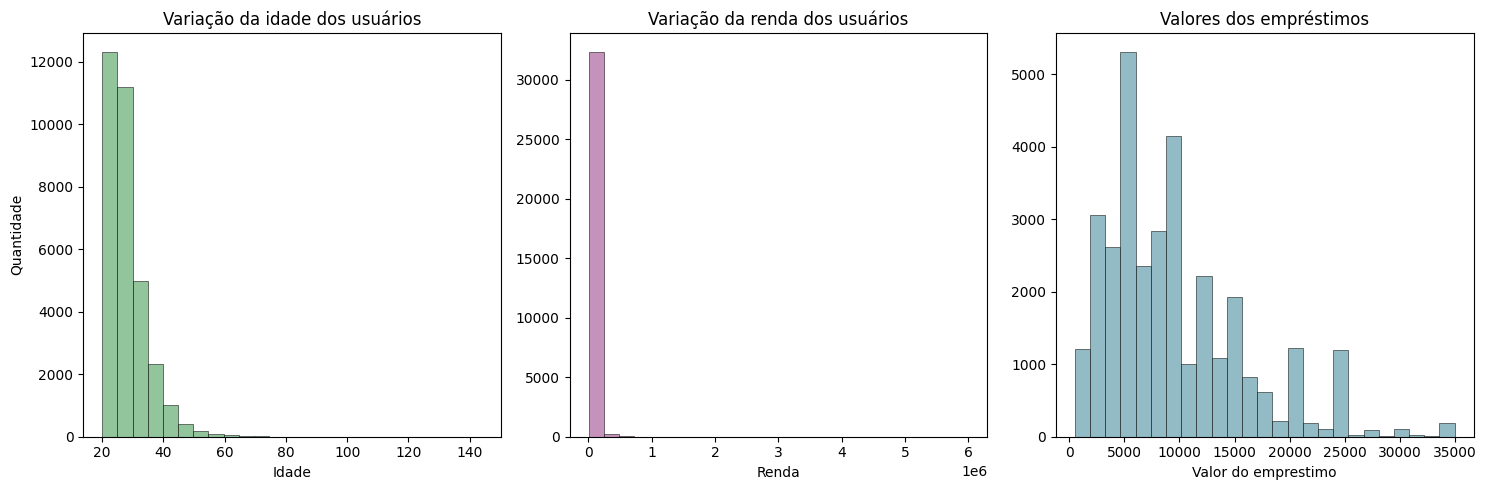

In [ ]:
#Layout para três gráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#Figura 1 - Idade
axs[0].hist(df['person_age'], alpha = 0.9, bins = 25, color = '#86bf91', edgecolor = 'black', lw = 0.4)
axs[0].set_title('Variação da idade dos usuários')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Quantidade')

#Figura 2 - Renda
axs[1].hist(df['person_income'], alpha = 0.9, bins = 25, color = '#BF86B4', edgecolor = 'black', lw = 0.4)
axs[1].set_title('Variação da renda dos usuários')
axs[1].set_xlabel('Renda')

#Figura 3 - Emprestimo
axs[2].hist(df['loan_amnt'], alpha = 0.9, bins = 25, color = '#86b4bf', edgecolor = 'black', lw = 0.4)
axs[2].set_title('Valores dos empréstimos')
axs[2].set_xlabel('Valor do emprestimo')

plt.tight_layout()
plt.show()

# 3. Gráficos de frequência das variáveis categoricas

In [ ]:
import seaborn as sns

<ipython-input-19-86a0ecde555f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x = df1['loan_status'], palette = 'coolwarm', edgecolor = 'black', lw = 0.4)


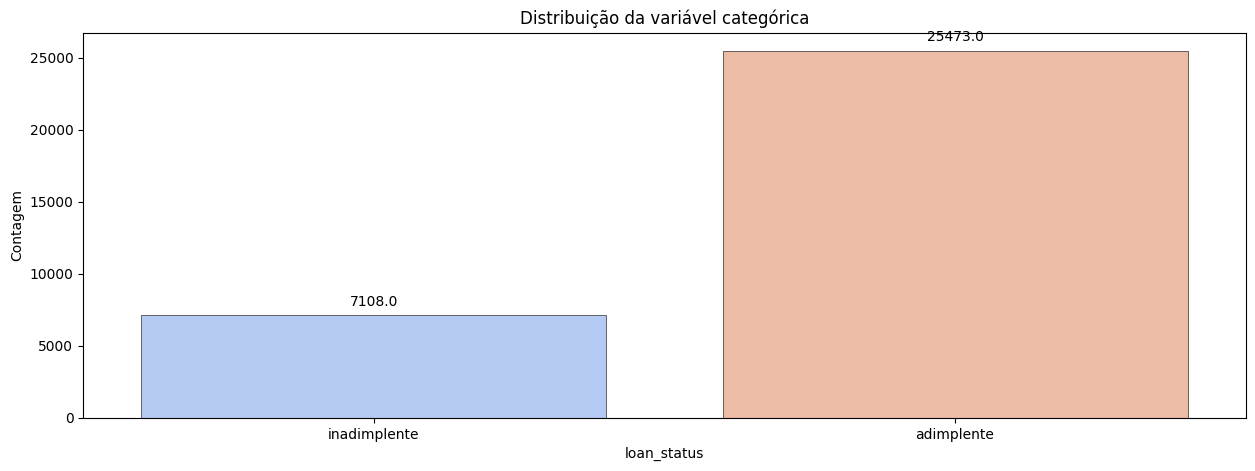

In [ ]:
plt.figure(figsize = (15, 5))
fig = sns.countplot(x = df1['loan_status'], palette = 'coolwarm', edgecolor = 'black', lw = 0.4)

fig.set_title('Distribuição da variável categórica')
fig.set_ylabel('Contagem')

for p in fig.patches:
    fig.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sns.set_palette('coolwarm')
plt.show()

# 4. Gráfico relacional

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.scatter_matrix(
    df,
    dimensions = ['person_age', 'person_income', 'loan_amnt'],
    color = 'loan_status',
    color_continuous_scale = px.colors.sequential.Sunset)
grafico.show()

# 5. Profitin

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df1, title = "Risco de crédito")

In [ ]:
#profile.to_widgets()

In [ ]:
profile.to_file("Risco de credito.html")